In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
import sncosmo
import varpop
import snpop

In [4]:
from snpop import SimpleSALTPopulation

In [5]:
from collections import OrderedDict

In [5]:
print(sncosmo.__version__)
print(varpop.__version__)
print(snpop.__version__)

1.5.3
0.1.0
0.1.1


# Simple SALT Distributions

The SALT model used for SNIa has the following parameters for each SNIa :
```x0, x1, c, z, t0 ```. During training, `SALT2` is designed to scale variables, such that at the
end of its training `x1` has a standard deviation of `1.0`, and `c` has a standard deviation of `0.1`.
While this does not imply that (a) the population of SNe have the same standard deviations for these
parameters and (b) they are uncorrelated, a population drawn with un-correlated `c` and `x1` with these
standard deviations is consistent with a homogeneous selection for the SALT2 training sample, and is often
used in simulations. A population with this character is described by `SimpleSALTPopulation`

There are two ways to use it:
1. Use it with a supplied sample of SN redshifts.
2. Supply it with the area of the sky, the duration of the survey, and the redshift bounds, and it will use a powerlaw rate for SN to obtain a redshift sample, and run through with the previous case. 

To start with we describe the first case

### `SimpleSALTPopulation`

obtain a set of samples for the redshift

In [6]:
zSamples = np.random.uniform(0, 1.0, size=10)
print(zSamples)

[ 0.65059906  0.21531551  0.118101    0.26170307  0.24705013  0.88650903
  0.28202962  0.04204624  0.38641397  0.96388482]


Instantiate the object

In [7]:
sp = SimpleSALTPopulation(zSamples, rng=np.random.RandomState(1))

In [8]:
sp.idxvalues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
sp.zSamples

array([ 0.29829967,  0.83845581,  0.27463729,  0.70287311,  0.26749356,
        0.01908381,  0.13027824,  0.05134585,  0.91541716,  0.94924475])

In [10]:
sp.cosmo

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[ 0.    0.    0.06] eV, Ob0=0.0486)

In [11]:
sp.paramsTable

,Mabs,MnoDisp,c,mB,t0,x0,x1,z,model
idx,,,,,,,,,
0,-19.847337,-19.828904,0.174481,21.160918,61102.130317,0.000054,-0.172428,0.298300,SALT2
1,-19.104782,-18.964417,-0.076121,24.584279,62209.184401,0.000002,-0.877858,0.838456,SALT2
2,-19.445005,-19.404822,0.031904,21.357347,59580.417468,0.000045,0.042214,0.274637,SALT2
3,-19.206254,-19.285807,-0.024937,24.013822,60683.513890,0.000004,0.582815,0.702873,SALT2
4,-19.741783,-19.638034,0.146211,20.995194,60115.659001,0.000063,-1.100619,0.267494,SALT2
5,-18.838548,-18.779035,-0.206014,15.826042,59917.035871,0.007399,1.144724,0.019084,SALT2
6,-19.401012,-19.297936,-0.032242,19.601082,60259.849772,0.000229,0.901591,0.130278,SALT2
7,-19.361462,-19.234681,-0.038405,17.503419,60841.296654,0.001582,0.502494,0.051346,SALT2
8,-19.855785,-19.755098,0.113377,24.067746,61028.201281,0.000004,0.900856,0.915417,SALT2


In [12]:
sp.modelParams(3)

OrderedDict([('Mabs', -19.206254055598105),
             ('MnoDisp', -19.285807375608833),
             ('c', -0.024937037547741011),
             ('mB', 24.013821665727949),
             ('t0', 60683.513890106216),
             ('x0', 3.936587159521316e-06),
             ('x1', 0.58281521371582223),
             ('z', 0.70287311381139872),
             ('model', 'SALT2')])

### 2. Generate From the skyArea, redshift bounds and survey Duration

This uses the `fromSkyArea` method

In general, we will not have a redshift distribution or a redshift sample to use. In this case, we prefer to use 
the `fromSkyArea` method which instead obtains these samples from using the fieldArea, zmin and zmax. Right now, we also need `numzBins` because of the binned implementation which we will later get rid of.

In [7]:
spz = SimpleSALTPopulation.fromSkyArea(rng=np.random.RandomState(1), fieldArea=0.5)

In [8]:
spz.zSamples.size

1359

In [9]:
spz.numSources

1359

In [11]:
spz.paramsTable.head()

,Mabs,MnoDisp,c,mB,t0,x0,x1,z,model
idx,,,,,,,,,
0,-18.802670,-18.865315,-0.133626,20.106976,62172.794211,0.000144,-0.137267,0.125250,SALT2
1,-19.805216,-19.697074,0.034845,19.485569,61243.098500,0.000254,2.615096,0.147226,SALT2
2,-19.270605,-19.130455,-0.105906,20.381716,61789.027067,0.000112,1.481818,0.171353,SALT2
3,-19.169834,-19.189046,-0.024831,20.898086,63194.982619,0.000069,-0.299846,0.203602,SALT2
4,-19.463884,-19.293108,0.011603,20.907009,62404.794312,0.000069,-0.393858,0.230553,SALT2


## Characterizations of the Distribution

## Form of the internal dispersion

In [38]:
import scipy

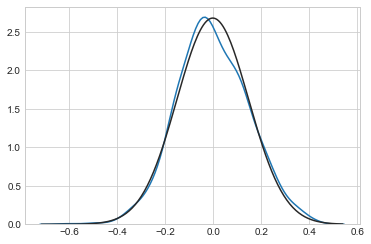

In [39]:
fig, ax = plt.subplots()
sns.distplot(spz.paramsTable.Mabs - spz.paramsTable.MnoDisp, hist=False, fit=scipy.stats.norm)

## Checks on the Hubble Diagram

In [40]:
from astropy.cosmology import Planck15

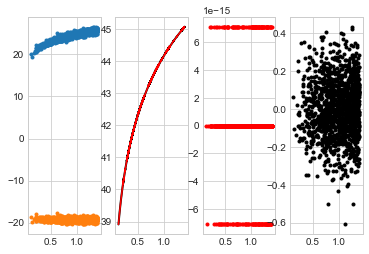

In [41]:
fig, ax = plt.subplots(1, 4)
#ax[0, 0].plot(spz.paramsTable.z, spz.paramsTable.mB, '.')
ax[0].plot(spz.paramsTable.z, spz.paramsTable.mB, '.')
ax[0].plot(spz.paramsTable.z, spz.paramsTable.Mabs, '.')
ax[1].plot(spz.paramsTable.z, Planck15.distmod(spz.paramsTable.z).value, color='k', lw=2)
ax[1].plot(spz.paramsTable.z, spz.paramsTable.mB - spz.paramsTable.Mabs, color='r')
ax[2].plot(spz.paramsTable.z, spz.paramsTable.mB - spz.paramsTable.Mabs - Planck15.distmod(spz.paramsTable.z).value, 'r.')
ax[3].plot(spz.paramsTable.z, spz.paramsTable.mB - spz.paramsTable.MnoDisp - Planck15.distmod(spz.paramsTable.z).value, 'k.')

## Distribution of x1 and c

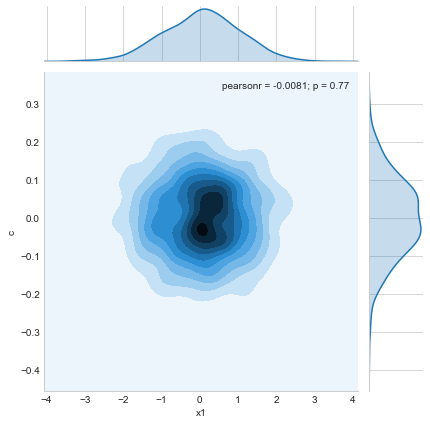

In [42]:
#fig = plt.figure(figsize=(6,6))
jp = sns.jointplot(data=spz.paramsTable, x='x1', y='c', kind='kde')
jp.fig.set_figheight(6)
jp.fig.set_figwidth(6)